# Dataset Draft

Dennis Chan 15833526 

Stanley Si Lin Wu 15417190 

Michael Dong 15804232 

Sander Neele 15857719 

Groep nummer: B1 (#1) 

# Titel
Factoren die mensen zijn voorkeur voor films of series beïnvloeden

# Beschrijving

IMDb is de bekendste website voor het beoordelen van films en series en er bestaat duidelijke tegenstellingen tussen films en series. Sommige mensen vinden films beter, terwijl sommige juist series beter vinden. Maar welke factoren bepalen dan deze voorkeuren? In dit project gaan we dus de data analyseren om te bepalen wat precies deze verschillen veroorzaakt. Sommigen vinden series leuker vanwege de grote hoeveelheid detail en zij liever thuis kijken, terwijl anderen films waarderen omdat ze een compleet verhaal in korte tijd vertellen en liever in de bioscoop kijken.  

In [1]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Dataset 1: IMDB Top 1000 Movies

https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-movies 

Hoeveelheid datapunten: 1000 records
 
Hoeveelheid variabelen in de dataset: 6 variabelen 

De database bevat de top 1000 best beoordeelde films op IMDb, elk met minstens 10.000 ratings. Voor elke film is de titel, genre, aantal votes, rating en de releasedatum genoteerd. Deze gegevens zijn verkregen via een (onofficiële) IMDb API en kunnen inzicht geven in trends en voorkeuren van gebruikers. 

In [2]:
data = pd.read_csv('../data/movies.csv')
data.head(n=10)

FileNotFoundError: [Errno 2] No such file or directory: '../data/movies.csv'

# Dataset 2: IMBD Top 1000 Series


https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-tv-series 

Hoeveelheid datapunten: 1000 records 

Hoeveelheid variabelen in de dataset: 6 variabelen


De database bevat een top 1000 top rated TV series in IMDb met minstens 10000 ratings. Daarin staat de titel, genre, aantal votes, rating en de releasedatum van de film. De data is verkregen door middel van een (Onofficieel) IMDb API, te vinden op RapidAPI. 


In [ ]:
data = pd.read_csv('../data/tvseries.csv')
data.head(n=10)

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2341969,2008
1,tt0185906,Band of Brothers,"Action, Drama, History",9.4,564041,2001
2,tt0795176,Planet Earth,"Documentary, Family",9.4,227819,2006
3,tt5491994,Planet Earth II,Documentary,9.4,166992,2016
4,tt5152226,Tree of Life,Drama,9.4,18826,2014
5,tt7366338,Chernobyl,"Drama, History, Thriller",9.3,954055,2019
6,tt0417299,Avatar: The Last Airbender,"Action, Adventure, Animation",9.3,408049,2005
7,tt0306414,The Wire,"Crime, Drama, Thriller",9.3,404808,2002
8,tt30263074,Sapne Vs Everyone,Drama,9.3,73898,2023
9,tt6769208,Blue Planet II,Documentary,9.3,52095,2017


De Data's worden met elkaar gemerged op basis van de benodigheden om grafieken te maken. De eerste wordt gedaan waarbij de votes van elk jaar bij elkaar wordt opgeteld van alle films en series van dat jaar en dat wordt totale votes. De tweede wordt gedaan waarbij de gemiddelde wordt berekend van de gemiddelde rating van alle films en series per jaar.

# Dataset Preprocessing 1

In [ ]:
# Laad beide CSV-bestanden
df1 = pd.read_csv("../data/movies.csv")  # Hier zit bijvoorbeeld 'Country' in
df2 = pd.read_csv("../data/tvseries.csv")  # Hier zit 'Location' i.p.v. 'Country' in

# Voeg een 'type' kolom toe om films/series te onderscheiden
df1["type"] = "film"
df2["type"] = "serie"

# Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# Groepeer per releaseYear en tel votes op
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "numVotes": "sum",  # Tel alle votes op per jaar
        "title": lambda x: " | ".join(x),  # Combineer titels met scheidingsteken
        "type": lambda x: " + ".join(x)    # Combineer types (film + serie)
    })
    .rename(columns={"title": "titles_combined"})  # Hernoem voor duidelijkheid
)


result.to_csv("../data/combined_votes_by_year.csv", index=True)

# Data Preprocessing 2

In [ ]:
# 1. Laad beide CSV-bestanden
df1 = pd.read_csv("../data/movies.csv")  # Films
df2 = pd.read_csv("../data/tvseries.csv")  # Series

# 2. Voeg een 'type' kolom toe
df1["type"] = "film"
df2["type"] = "serie"

# 3. Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# 4. Bereken gemiddelde rating per jaar
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "averageRating": "mean",  # Gemiddelde rating per jaar
        "numVotes": "sum",        # Totale votes per jaar (optioneel)
        "title": lambda x: x.nunique(),  # Aantal unieke titels per jaar
        "type": lambda x: ", ".join(x.unique())  # Unieke types per jaar
    })
    .rename(columns={
        "averageRating": "mean_rating",
        "numVotes": "total_votes",
        "title": "unique_titles_count"
    })
)

# 5. Sla het resultaat op
result.to_csv("../data/combined_stats_by_year.csv", index=True)

# Perspectief 1

In onze moderne social media zijn zowel films als series populair, maar toch hebben ze andere behoeftes. Films bieden een korte en eenmalige beleving met relatief weinig inspanning, terwijl series veel langer zijn, waardoor  meer karakterontwikkeling en een diepere verhaallijn mogelijk is. Daarnaast sluit het kijken van series thuis beter aan bij de levensstijl van vandaag dankzij  Netflix en HBO. Door de coronapandemie zal deze trend nog meer versterkt worden, omdat mensen meer tijd thuis doorbrachten, is het seriekijken verder toegenomen.  Onze analyse van IMDB top 1000 films en top 1000 series bevestigt dat series over het algemeen van hoger kwaliteit zijn en daardoor ook hoger scoren dan films. 

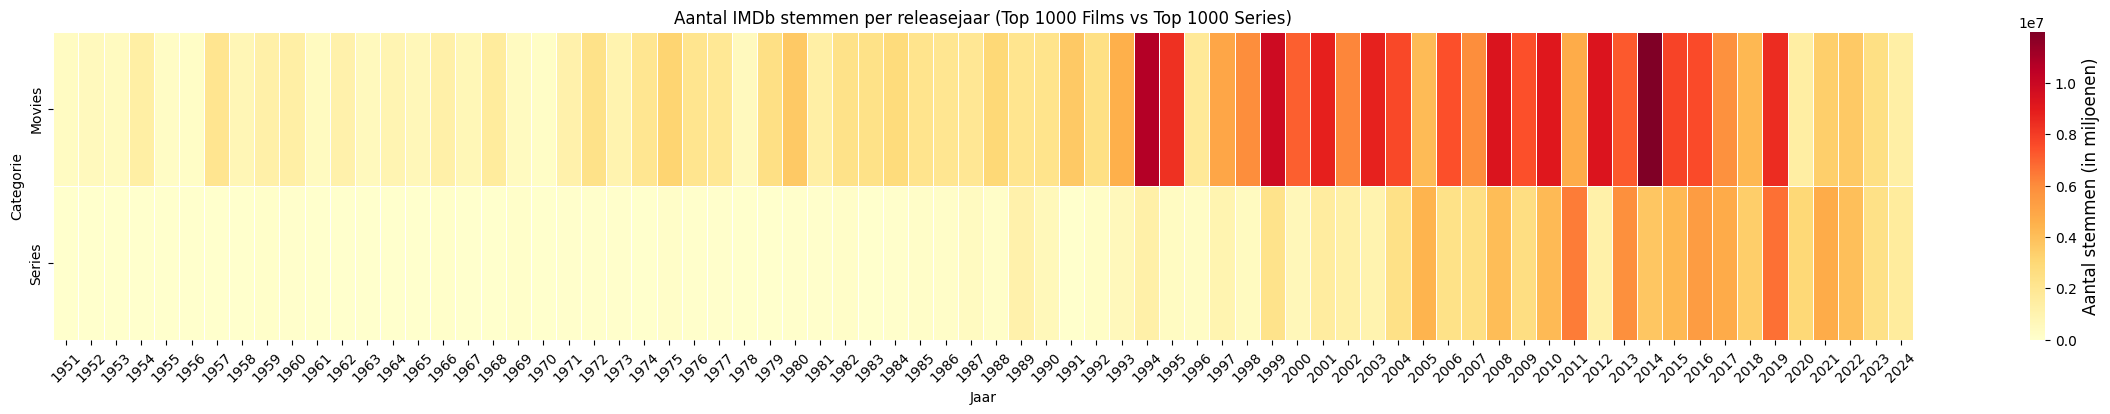

In [ ]:


############# FILMS + SERIES APART######################### 



# --- Movies ---
movies_df = pd.read_csv("../data/movies.csv")
movies_votes = movies_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
movies_votes.name = 'Movies'

# --- Series ---
series_df = pd.read_csv("../data/tvseries.csv")
series_votes = series_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
series_votes.name = 'Series'

# Combine into one DataFrame for heatmap (rows = categorieën, columns = jaren)
heatmap_df = pd.concat([movies_votes, series_votes], axis=1).T

plt.figure(figsize=(30, 4))
ax = sns.heatmap(
    heatmap_df,
    cmap='YlOrRd',
    cbar=True,
    xticklabels=range(1951, 2025),
    linewidths=0.5,
    linecolor='white'
)

# Colorbar label aanpassen
colorbar = ax.collections[0].colorbar
colorbar.set_label('Aantal stemmen (in miljoenen)', fontsize=12)

# Formatter instellen: toon als miljoenen

plt.title('Aantal IMDb stemmen per releasejaar (Top 1000 Films vs Top 1000 Series)')
plt.xlabel('Jaar')
plt.ylabel('Categorie')
plt.xticks(rotation=45)
plt.show()

# Argument 1: 
We zien dat films veel meer stemmen krijgt dan series, wat blijkt uit de heat graph (grafiek hierboven). De films zijn duideliujk roder (dus meer stemmen) voor alle bijna alle jaren. Dat betekent dat kwalitatieve films significant meer worden bekeken. Films kregen sinds 1980 duidelijk ook meer stemmen. Tot ongeveer 2005 is er vrijwel geen bijzondere activiteit voor series zichtbaar, tot de opkomst van streamingsdiensten als netflix.  Daarnaast is het opvallend dat in recentere jaren rond 2020-2024 series juist populairder zijn, door de coronapandemie. Dit zien we ook terug in de grafiek hieronder.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



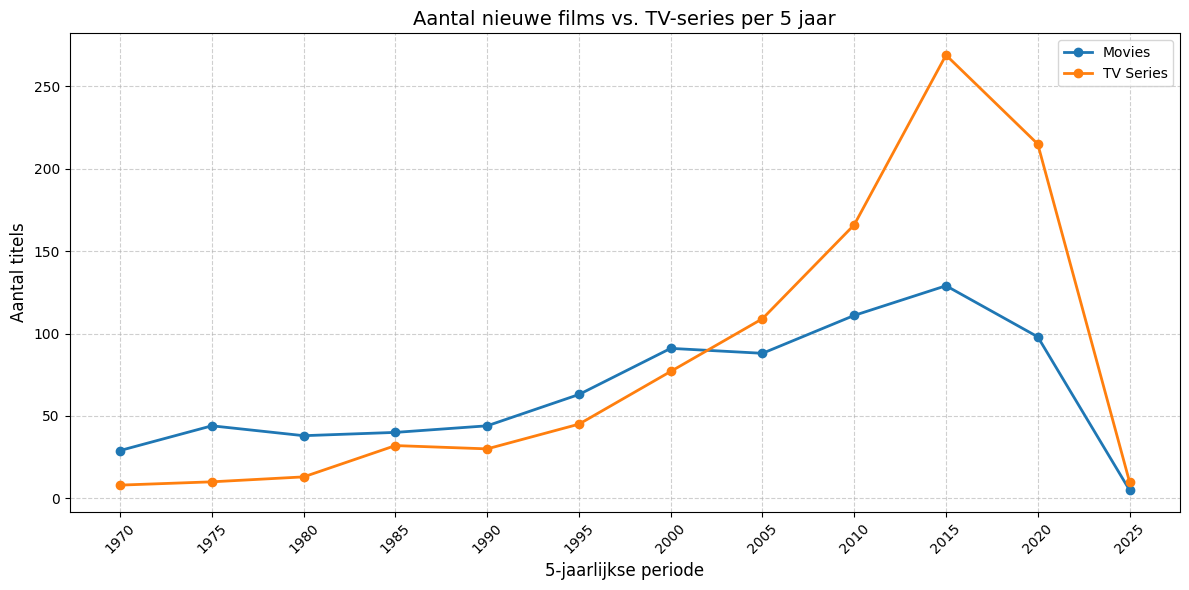

In [ ]:
# CSV lezen
movies = pd.read_csv('../data/movies.csv')
tvseries = pd.read_csv('../data/tvseries.csv')

# Functie om jaren af te ronden naar 5-jarige intervallen
def round_to_5yr(year):
    return (year // 5) * 5

# Rond alle releaseYear af.
movies['releasePeriod'] = movies['releaseYear'].apply(round_to_5yr)
tvseries['releasePeriod'] = tvseries['releaseYear'].apply(round_to_5yr)

# Tel aantal titels per periode
movies_per_period = movies['releasePeriod'].value_counts().sort_index()
tvseries_per_period = tvseries['releasePeriod'].value_counts().sort_index()

# Combineer in één DataFrame
combined = pd.DataFrame({
    'Movies': movies_per_period,
    'TV Series': tvseries_per_period
}).fillna(0).astype(int)  # Vervang NaN door 0

# Toon vanaf 1970
combined = combined[combined.index >= 1970]  

# Plot
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Movies'], label='Movies', marker='o', linewidth=2)
plt.plot(combined.index, combined['TV Series'], label='TV Series', marker='o', linewidth=2)

# Titel en labels
plt.title('Aantal nieuwe films vs. TV-series per 5 jaar', fontsize=14)
plt.xlabel('5-jaarlijkse periode', fontsize=12)
plt.ylabel('Aantal titels', fontsize=12)
plt.xticks(combined.index, rotation=45) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

# Argument 2
Series worden steeds populair over de jaren heen en als je kijkt naar de grafiek "Aantal nieuwe films vs. TV-series per 5 jaar" kan je zien dat 2003 het aantal uitgebrachte series (in de top 1000) meer werd vergeleken met films. Dus films waren historisch populairder, maar series zijn sinds 2003 veel populairder geworden. 


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

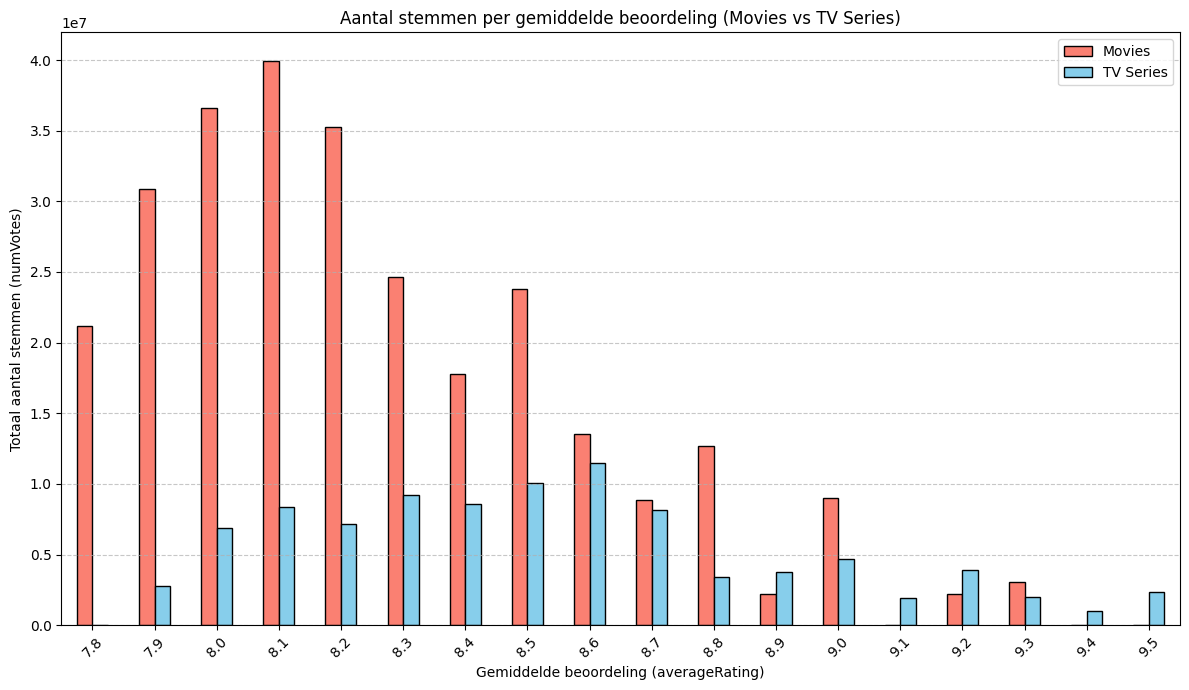

In [ ]:


df_movies = pd.read_csv("../data/movies.csv")
df_tv = pd.read_csv("../data/tvseries.csv")

rating_votes_movies = df_movies.groupby("averageRating")["numVotes"].sum()
rating_votes_tv = df_tv.groupby("averageRating")["numVotes"].sum()

# Combineer in één DataFrame
df_combined = pd.DataFrame({
    "Movies": rating_votes_movies,
    "TV Series": rating_votes_tv
}).fillna(0)  # vul eventuele NaN met 0

df_combined.plot(kind="bar", figsize=(12, 7), edgecolor='black', color=['salmon', 'skyblue'])
plt.title("Aantal stemmen per gemiddelde beoordeling (Movies vs TV Series)")
plt.xlabel("Gemiddelde beoordeling (averageRating)")
plt.ylabel("Totaal aantal stemmen (numVotes)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Argument 3

UIt de grafiek zien we dus dat films aanzienlijk meer stemmen ontvangen dan tv-series, dit verschil kan worden verklaard doordat dfilms over het algemeen korter zijn en daardoor dus makkelijker en sneller bekeken worden. Ze zijn dus toegankelijker voor een breder publiek, waardoor er dus ook meer stemmen en beoordelingen zijn. 

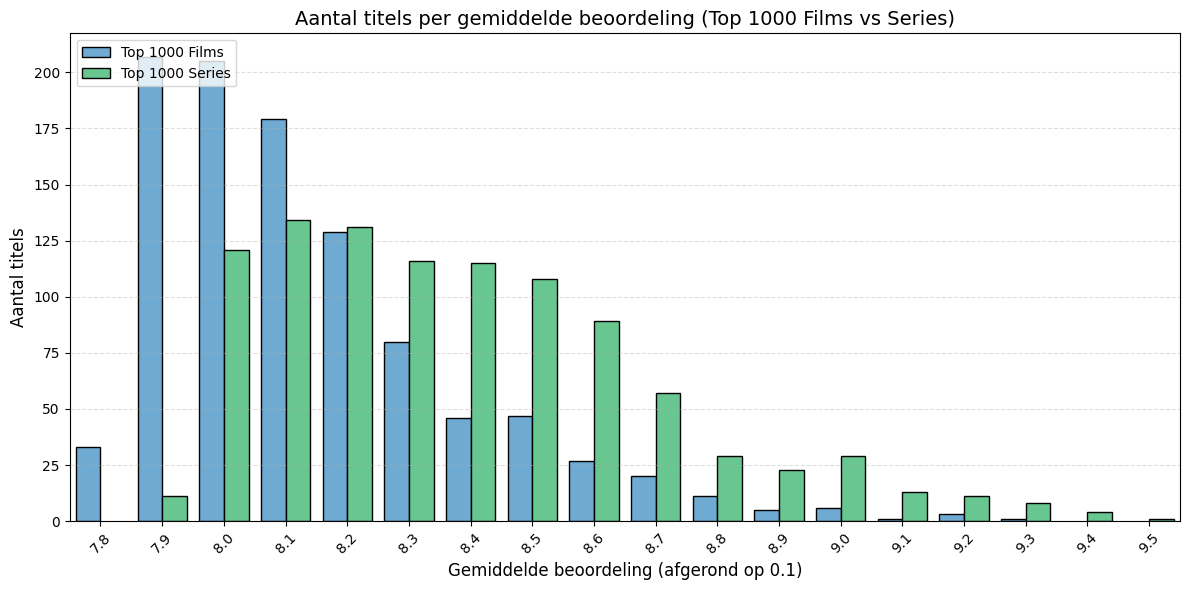

In [ ]:
# Load data
movies_df = pd.read_csv("../data/movies.csv")
series_df = pd.read_csv("../data/tvseries.csv")

# Count number of titles per rating
movies_counts = movies_df["averageRating"].value_counts().sort_index()
series_counts = series_df["averageRating"].value_counts().sort_index()

# Combine into one DataFrame
combined_df = pd.DataFrame({
    "rating": movies_counts.index.tolist() + series_counts.index.tolist(),
    "count": list(movies_counts.values) + list(series_counts.values),
    "type": ["Top 1000 Films"] * len(movies_counts) + ["Top 1000 Series"] * len(series_counts)
})

# Round ratings to 1 decimal for nicer grouping
combined_df["rating"] = combined_df["rating"].round(1)

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_df,
    x="rating",
    y="count",
    hue="type",
    palette=["#5DADE2", "#58D68D"],
    edgecolor="black"

)

plt.title("Aantal titels per gemiddelde beoordeling (Top 1000 Films vs Series)", fontsize=14)
plt.xlabel("Gemiddelde beoordeling (afgerond op 0.1)", fontsize=12)
plt.ylabel("Aantal titels", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="", loc="upper left")
plt.tight_layout()
plt.show()

# Argument 4

Films blijven voornamelijk in het 7.9-8.1 bereik. Series domineren consistent vanaf 8.3 tot 9.5. Opmerkelijk is dat bij 8.2 nog gelijkheid is, maar daarna hebben series duidelijk hogere scores. Dus hoewel films meer stemmen krijgt. Dit suggeert dat series meer wordt gewaardeerd dan films. 

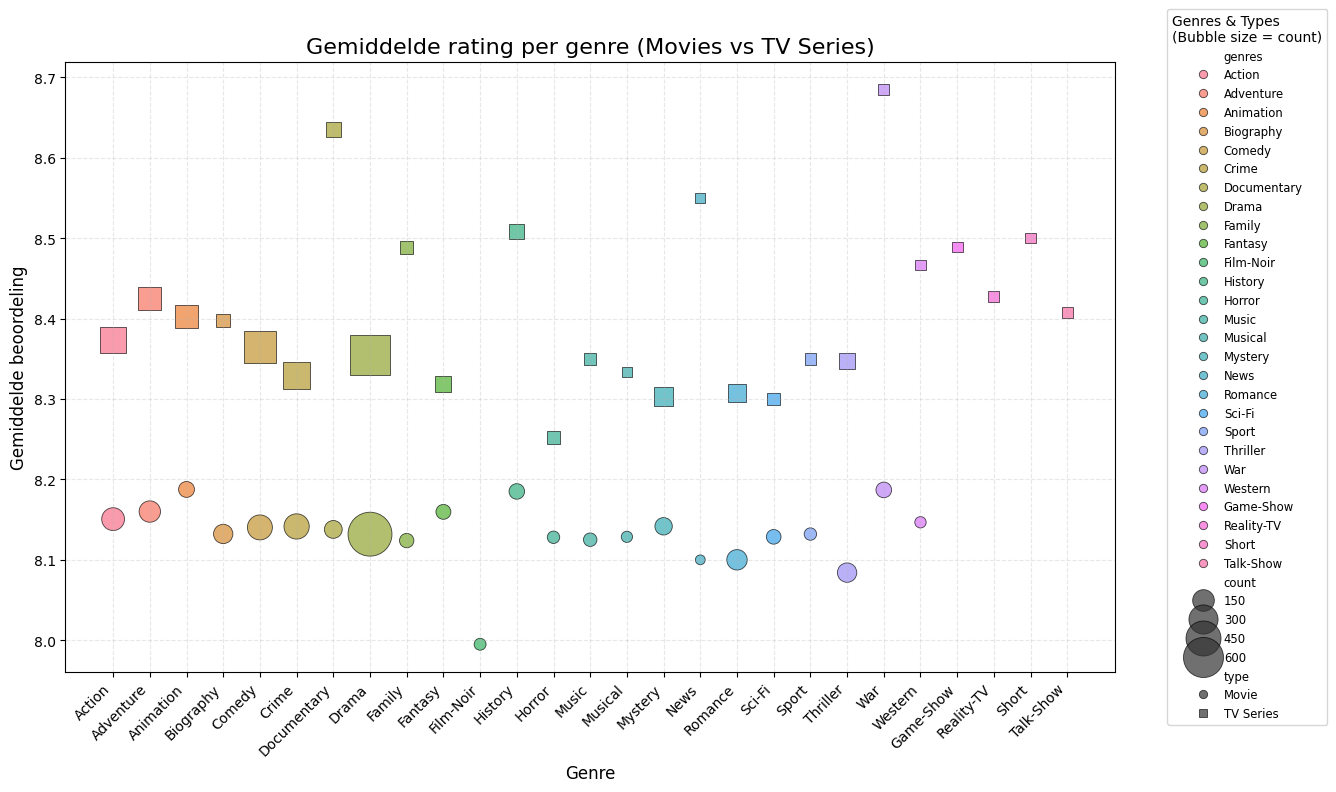

In [ ]:
# Load and prepare movies data
movies_df = pd.read_csv("../data/movies.csv")
movies_df = movies_df.assign(genres=movies_df["genres"].str.split(",")).explode("genres")
movies_df["genres"] = movies_df["genres"].str.strip()
movies_stats = movies_df.groupby("genres").agg(
    averageRating=("averageRating", "mean"),
    count=("title", "count"),
).reset_index()
movies_stats['type'] = 'Movie'  # Add type column

# Load and prepare TV series data
series_df = pd.read_csv("../data/tvseries.csv")
series_df = series_df.assign(genres=series_df["genres"].str.split(",")).explode("genres")
series_df["genres"] = series_df["genres"].str.strip()
series_stats = series_df.groupby("genres").agg(
    averageRating=("averageRating", "mean"),
    count=("title", "count"),
).reset_index()
series_stats['type'] = 'TV Series'  # Add type column

# Combine both datasets
combined_stats = pd.concat([movies_stats, series_stats])

plt.figure(figsize=(14, 8))
markers = {"Movie": "o", "TV Series": "s"}  # Circle for movies, square for TV

# Create bubble chart with different markers for movies and TV series
scatter = sns.scatterplot(
    data=combined_stats,
    x="genres",
    y="averageRating",
    size="count",
    sizes=(50, 1000),  # Adjust size range as needed
    hue="genres",      # Rainbow colors by genre
    style="type",      # Different markers for Movie/TV Series
    markers=markers,  # Custom markers
    edgecolor="black", # Outline for all bubbles
    alpha=0.7,
    palette="husl",    # Rainbow color palette
    legend="brief"
)

plt.title("Gemiddelde rating per genre (Movies vs TV Series)", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Gemiddelde beoordeling", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Customize legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles,
    labels,
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    borderaxespad=0,
    title="Genres & Types\n(Bubble size = count)",
    fontsize='small',
    title_fontsize='medium'
)

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

# Argument 5

De gemiddelde rating per genre is voor tv series natuurlijk hoger dan films dan ook. Over het algemeen zien we dat voor movies het allemaal rond de 8.1-8.2 zit voor elke genre, terwijl voor tv series de meeste zitten op 8.3 tot 8.4. Daarnaast zien we dat oorlogsseries een 8.7 rating scoren, en documentseries met 8.6. Dit zijn zeer hoge ratings vergeleken met de andere genres die rond de 8.1-8.2 zitten. OOk familie, geschiedenis, gameshows presteren goed met een gemiddelde van 8.5. We kunnen dus concluderen dat series domineren vanaf 8.3 tot aan de top van de ratingschaal. 















# Perspectief 2

Moderne films en series hebben betere technologieën zoals CGI en de hogere productiebudget, waardoor ze dus visueel er beter uit zien. Aan de andere kant hebben we oude klassieke films die vaak meer echte verhalen hebben zonder te veel computer trucjes. Hierdoor moesten de acteurs juist goed acteren. Daarom kijken mensen deze films nog steeds deze klassiekers. 



# Argument 1
Hoewel meeste mensen van moderne films houden, zien we nogsteeds dat er mensen zijn die genieten van ouderwetse films door hun acteurstijl. Het is te zien aan de heatmap. Er bestaat nog steeds votes in 1920 tot 1980

# Argument 2
Moderne films en series kunnen een hogere vote hebben dan films en series in het verleden, omdat moderne films meer gepromote en geadvertiseert worden dan films en series uit het verleden. Toch worden films en series uit het verleden even goed gewaardeerd als de films en series tegenwoordig. Dit is te zien aan figuur heatmap, mindervote in jaren 1920 tot 1980 en figuur areaplot, waar de rating door de jaren heen ongeveer even hoog staat. 

# Totaal aantal IMBD votes per releasejaar van de top 1000 films en series

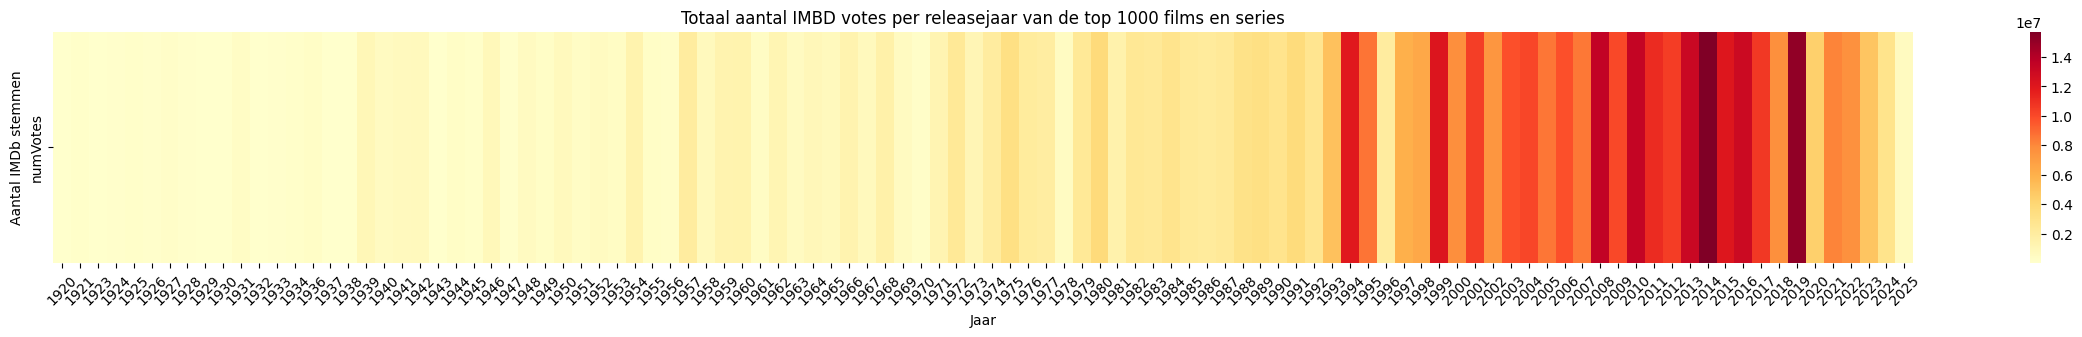

In [ ]:
#################### gecombineerd TVSeries en Films top 1000 ################

df = pd.read_csv("../data/combined_votes_by_year.csv")

#voeg het totale aantal votes per jaar
votes_per_year = df.groupby('releaseYear')['numVotes'].sum().reset_index()

#lijst van alle jaren in de dataset
all_years = sorted(df['releaseYear'].unique())  # Sorteer de jaren

#Zorg dat de heatmap-data alle jaren bevat (zelfs als sommige geen votes hebben)
heatmap_data = votes_per_year.set_index('releaseYear').reindex(all_years).T.fillna(0)


plt.figure(figsize=(30, 3))
sns.heatmap(heatmap_data, fmt='.1f', cmap='YlOrRd', cbar=True, xticklabels=all_years)
plt.title('Totaal aantal IMBD votes per releasejaar van de top 1000 films en series')
plt.xlabel('Jaar')
plt.ylabel('Aantal IMDb stemmen')
plt.xticks(rotation=45)
plt.show()

# Gemiddelde filmrating per jaar

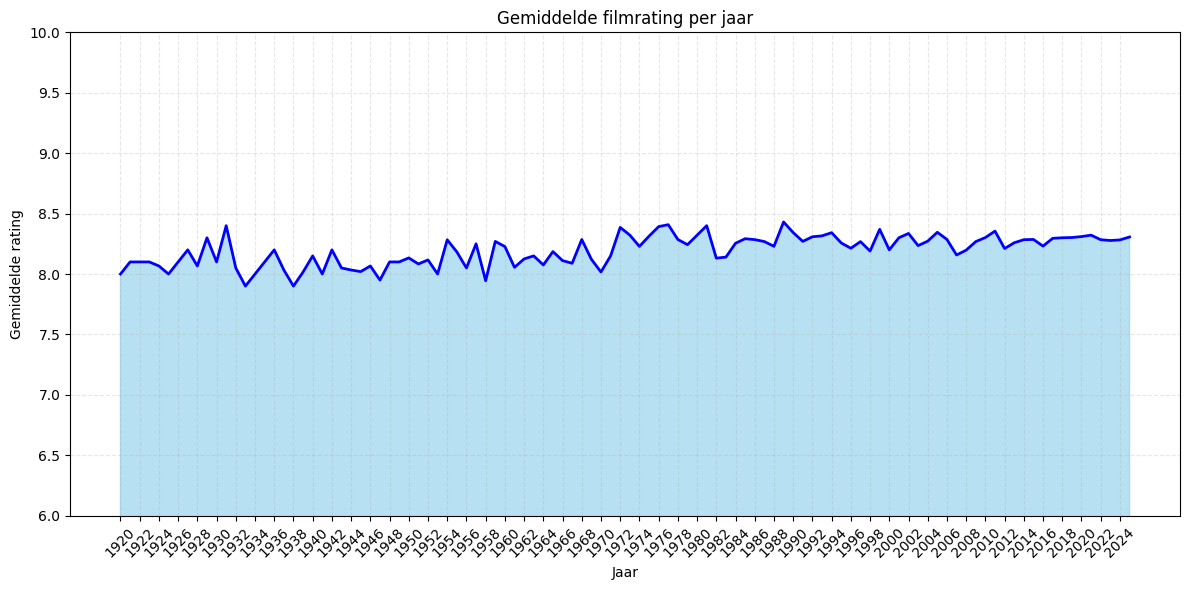

In [ ]:
# Laad je data
df = pd.read_csv("../data/combined_stats_by_year.csv")

# Bereken gemiddelde rating per jaar
avg_rating_by_year = df.groupby("releaseYear")["mean_rating"].mean()

# Plot als area plot
plt.figure(figsize=(12, 6))
plt.fill_between(avg_rating_by_year.index, avg_rating_by_year.values, color="skyblue", alpha=0.6)
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color="blue", linewidth=2)

plt.title("Gemiddelde filmrating per jaar")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde rating")
plt.ylim(6, 10)  # Forceer y-as van 6 tot 10
plt.grid(alpha=0.3, linestyle="--")
plt.xticks(
    range(avg_rating_by_year.index.min(), avg_rating_by_year.index.max() + 1, 2),  # Om de 5 jaar
    rotation=45
)

plt.tight_layout()
plt.show()

# Argument 3 
Alleen bij de meest bekeken films (met meer dan één miljoen stemmen) is een duidelijke stijging in de gemiddelde beoordeling zichtbaar, zoals te zien is in de regressiegrafiek. Voor het grootste deel van de dataset blijft het verband tussen populariteit (aantal stemmen) en waardering echter zwak. Minder bekende films scoren dus vaak net zo goed als blockbusters.

# Aantal stemmen met de gemiddelde beoordeling

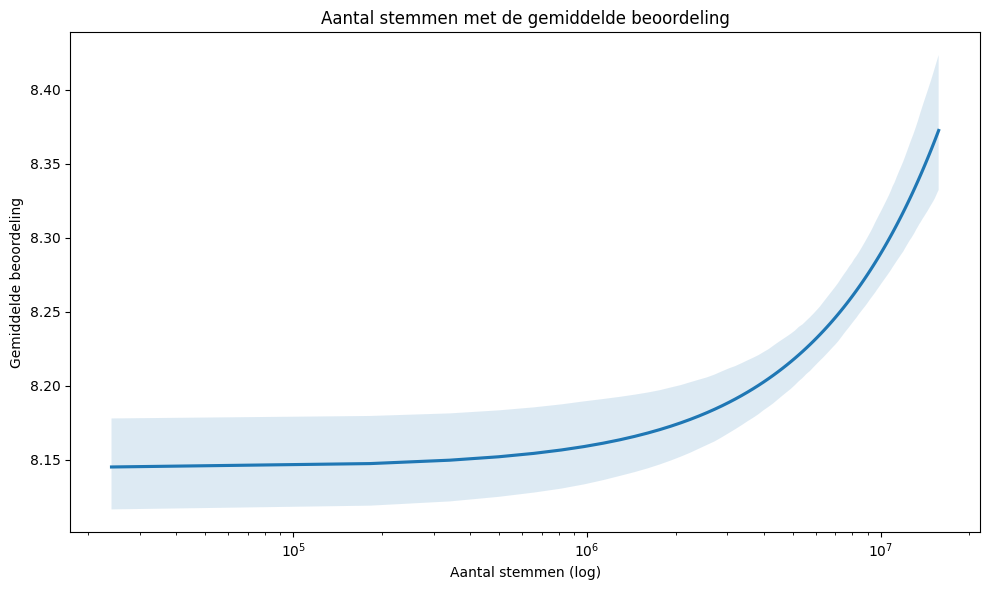

In [ ]:
df = pd.read_csv("../data/combined_stats_by_year.csv")

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="total_votes", y="mean_rating",
            scatter=False)

plt.xscale("log")
plt.title("Aantal stemmen met de gemiddelde beoordeling")
plt.xlabel("Aantal stemmen (log)")
plt.ylabel("Gemiddelde beoordeling")
plt.tight_layout()
plt.show()


# Argument 4 
Moderne technologieën maken het mogelijk om films visueel aantrekkelijker te maken, maar dat betekent niet dat oudere films worden vergeten. In de heatmap zien we dat er nog steeds stemmen worden gegeven aan films uit de periode 1950–1980. Dit wijst erop dat kijkers nog steeds de moeite nemen om deze oudere titels op te zoeken en te beoordelen, ondanks dat ze niet dezelfde visuele middelen hebben als moderne films. Dit ondersteunt het idee dat inhoud en acteerwerk nog altijd gewaardeerd worden.

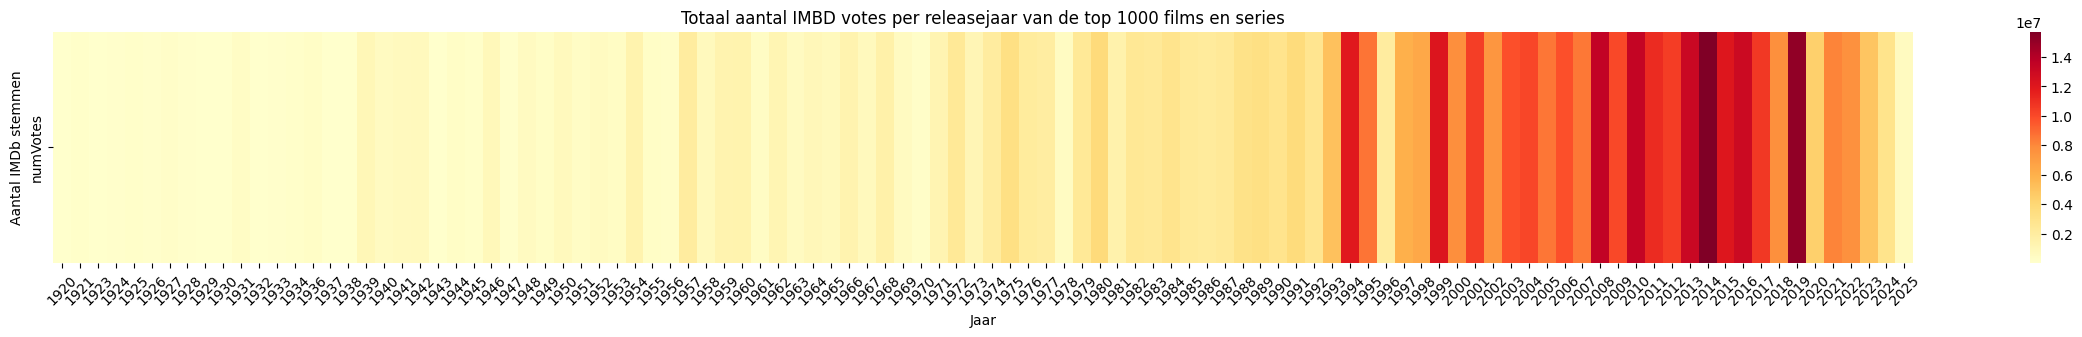

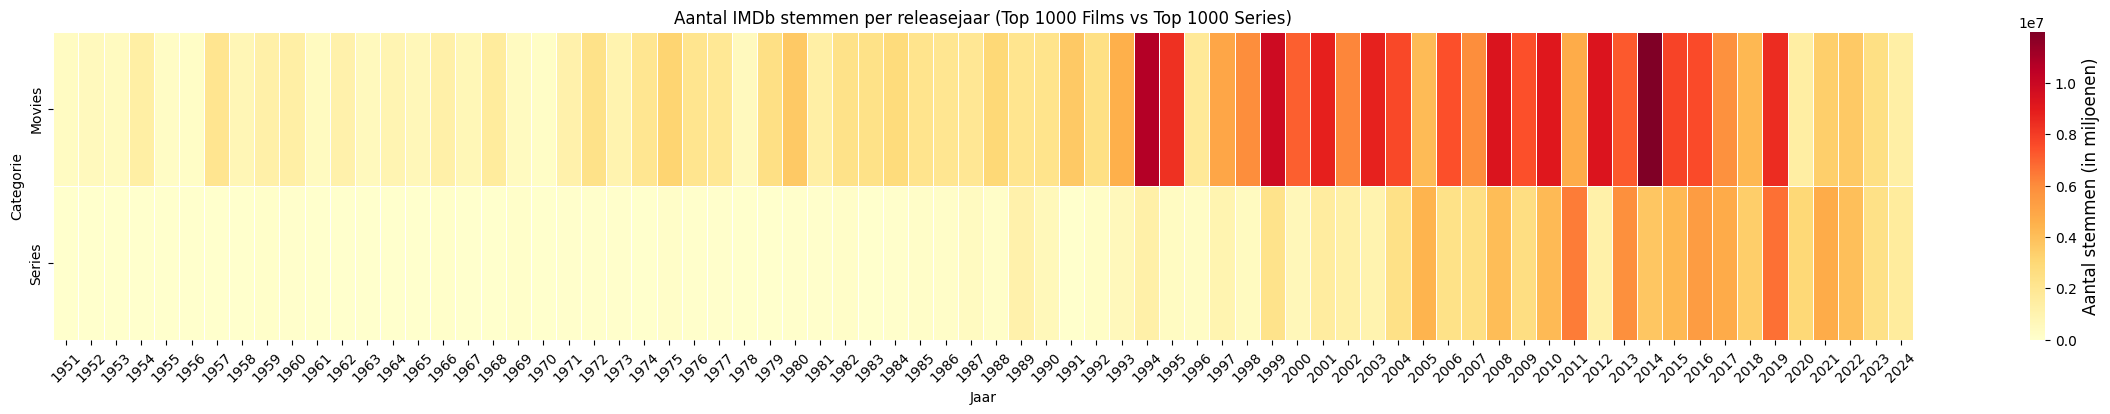

In [ ]:
df = pd.read_csv("../data/combined_votes_by_year.csv")

#voeg het totale aantal votes per jaar
votes_per_year = df.groupby('releaseYear')['numVotes'].sum().reset_index()

#lijst van alle jaren in de dataset
all_years = sorted(df['releaseYear'].unique())  # Sorteer de jaren

#Zorg dat de heatmap-data alle jaren bevat (zelfs als sommige geen votes hebben)
heatmap_data = votes_per_year.set_index('releaseYear').reindex(all_years).T.fillna(0)


plt.figure(figsize=(30, 3))
sns.heatmap(heatmap_data, fmt='.1f', cmap='YlOrRd', cbar=True, xticklabels=all_years)
plt.title('Totaal aantal IMBD votes per releasejaar van de top 1000 films en series')
plt.xlabel('Jaar')
plt.ylabel('Aantal IMDb stemmen')
plt.xticks(rotation=45)
plt.show()



# --- Movies ---
movies_df = pd.read_csv("../data/movies.csv")
movies_votes = movies_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
movies_votes.name = 'Movies'

# --- Series ---
series_df = pd.read_csv("../data/tvseries.csv")
series_votes = series_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
series_votes.name = 'Series'

# Combine into one DataFrame for heatmap (rows = categorieën, columns = jaren)
heatmap_df = pd.concat([movies_votes, series_votes], axis=1).T

plt.figure(figsize=(30, 4))
ax = sns.heatmap(
    heatmap_df,
    cmap='YlOrRd',
    cbar=True,
    xticklabels=range(1951, 2025),
    linewidths=0.5,
    linecolor='white'
)

# Colorbar label aanpassen
colorbar = ax.collections[0].colorbar
colorbar.set_label('Aantal stemmen (in miljoenen)', fontsize=12)

# Formatter instellen: toon als miljoenen

plt.title('Aantal IMDb stemmen per releasejaar (Top 1000 Films vs Top 1000 Series)')
plt.xlabel('Jaar')
plt.ylabel('Categorie')
plt.xticks(rotation=45)
plt.show()

# Argument 5 
Films met meer dan 1 miljoen stemmen hebben veel verschil in beoordeling. Sommige mensen geven een hoge score, anderen juist lager. Dat betekent dat bekende moderne films niet door iedereen goed gevonden worden. Minder bekende films scoren juist vaker gemiddeld. Dit laat zien dat een groot budget en veel techniek niet altijd zorgen voor een betere waardering.

# Boxplot: Beoordeling per stemcategorie

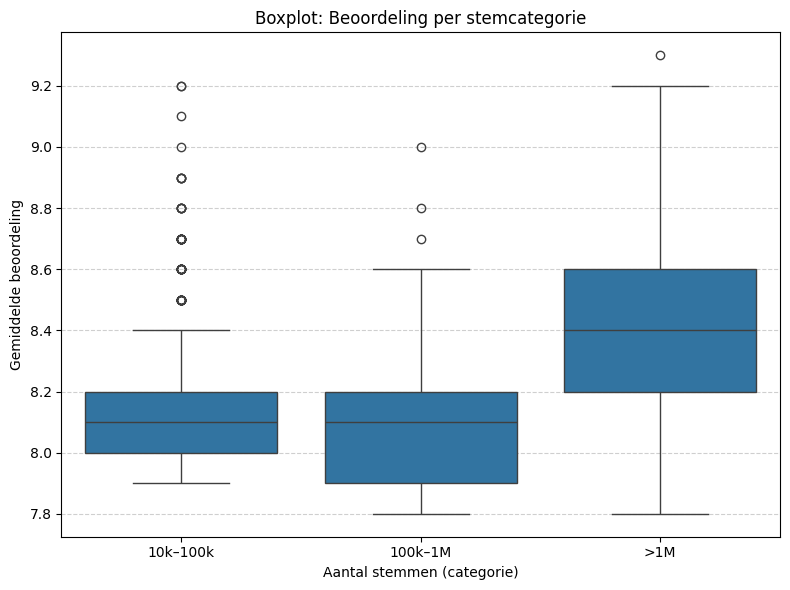

In [ ]:
df = pd.read_csv("../data/movies.csv") 

# Categoriseer het aantal stemmen
bins = [10000, 100000, 1000000, float('inf')]
labels = ['10k–100k', '100k–1M', '>1M']
df['vote_category'] = pd.cut(df['numVotes'], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='vote_category', y='averageRating')
plt.xlabel('Aantal stemmen (categorie)')
plt.ylabel('Gemiddelde beoordeling')
plt.title('Boxplot: Beoordeling per stemcategorie')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
